<a href="https://colab.research.google.com/github/msuganthan/Algorithms/blob/master/2_Linear_Algebra_ii.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Eigendecomposition

Affine Transformation via Matrix Application

In [3]:
import numpy as np
import torch

In [4]:
v = np.array([3, 1])
v

array([3, 1])

In [5]:
import matplotlib.pyplot as plt

In [6]:
def plot_vectors(vectors, colors):
    plt.figure()
    plt.axvline(x=0, color='lightgray')
    plt.axhline(y=0, color='lightgray')

    for i in range(len(vectors)):
        x = np.concatenate([[0,0],vectors[i]])
        plt.quiver([x[0]], [x[1]], [x[2]], [x[3]],
                   angles='xy', scale_units='xy', scale=1, color=colors[i],)

(-1.0, 5.0)

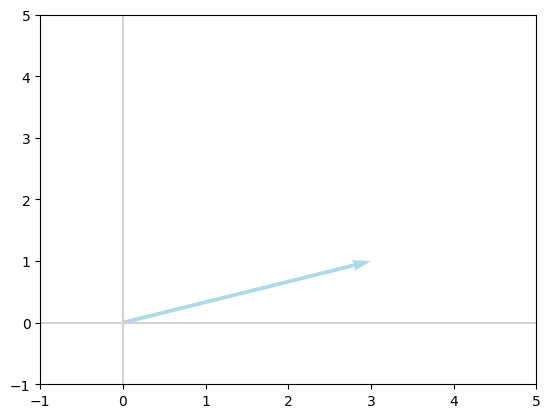

In [7]:
plot_vectors([v], ['lightblue'])
plt.xlim(-1, 5)
plt.ylim(-1, 5)

Appling a matrix to a vector can linearly transform the vector, e.g, rotate it or rescale it

The identity matrix, is the exception that proves the rule: Applying an identity matrix does not transform the vector

In [8]:
I = np.array([[1, 0], [0, 1]])
I

array([[1, 0],
       [0, 1]])

In [9]:
Iv = np.dot(I, v)
Iv

array([3, 1])

In [10]:
v == Iv

array([ True,  True])

(-1.0, 5.0)

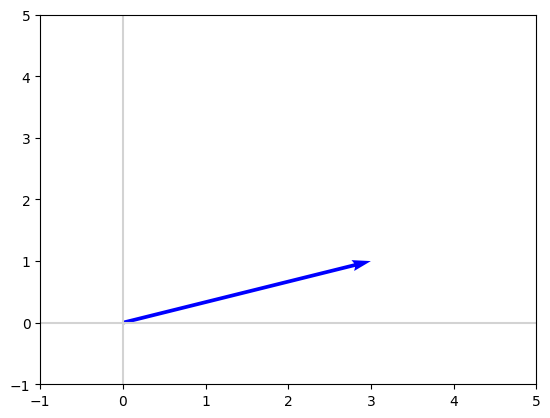

In [11]:
plot_vectors([Iv], ['blue'])
plt.xlim(-1, 5)
plt.ylim(-1, 5)

In constrast, consider the matrix that flips vector over the x-axis

In [12]:
E = np.array([[1, 0], [0, -1]])
E

array([[ 1,  0],
       [ 0, -1]])

In [13]:
Ev = np.dot(E, v)
Ev

array([ 3, -1])

(-3.0, 3.0)

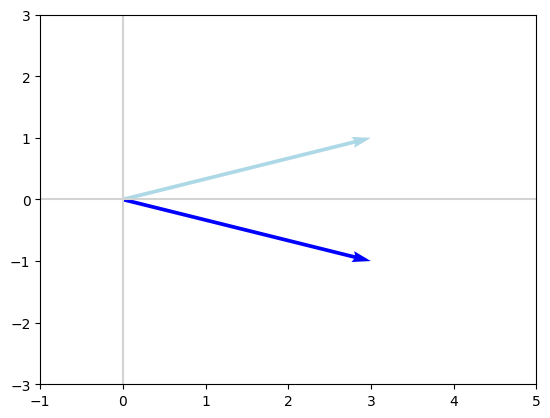

In [14]:
plot_vectors([v, Ev], ['lightblue', 'blue'])
plt.xlim(-1, 5)
plt.ylim(-3, 3)

Or, this matrix, F, which flips vectors over the y-axis

In [15]:
F = np.array([[-1, 0], [0, 1]])
F

array([[-1,  0],
       [ 0,  1]])

In [16]:
Fv = np.dot(F, v)
Fv

array([-3,  1])

(-1.0, 5.0)

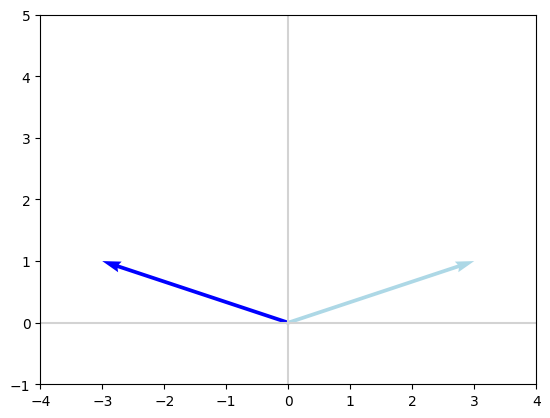

In [17]:
plot_vectors([v, Fv], ['lightblue', 'blue'])
plt.xlim(-4, 4)
plt.ylim(-1, 5)

Applying a flipping matrix is an example of **affline trandforamtion**: a change in geometry that may adjust distances or angles between vector, but preserves parallelism between them.

In addition to flipping a matrix over an axis, other common affine transformation include:

* Scaling
* Shearing
* Rotation

A single matrix can apply multiple affine transforms simultaneously. As an example, let's see what happens when we apply this matrix A to the vector v:

In [18]:
A = np.array([[-1, 4], [2, -2]])
A

array([[-1,  4],
       [ 2, -2]])

In [19]:
Av = np.dot(A, v)
Av

array([1, 4])

(-1.0, 5.0)

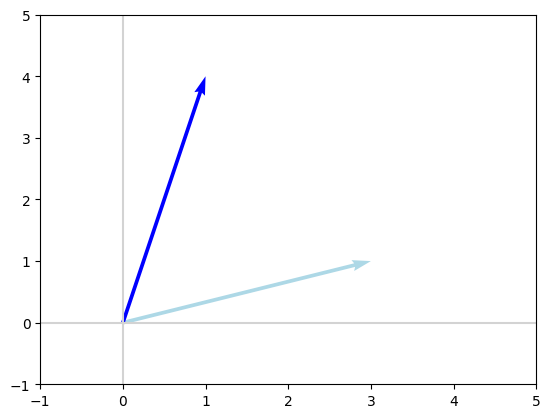

In [20]:
plot_vectors([v, Av], ['lightblue', 'blue'])
plt.xlim(-1, 5)
plt.ylim(-1, 5)

(-1.0, 5.0)

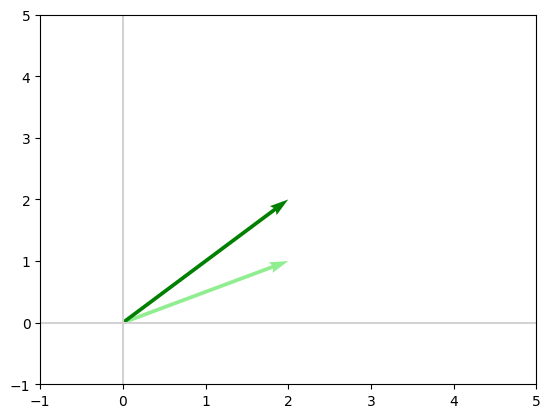

In [21]:
v2 = np.array([2, 1])
plot_vectors([v2, np.dot(A, v2)], ['lightgreen', 'green'])
plt.xlim(-1, 5)
plt.ylim(-1, 5)

We can concatenate several vectors together into a matrix(V) where each column is a separate vector. Then, whatever linear transformations we apply to V will be independently applied to each column(vector):

In [22]:
v

array([3, 1])

In [23]:
np.matrix(v).T

matrix([[3],
        [1]])

In [24]:
v3 = np.array([-3, -1])
v4 = np.array([-1, 1])

In [25]:
V = np.concatenate((
    np.matrix(v).T,
    np.matrix(v2).T,
    np.matrix(v3).T,
    np.matrix(v4).T
), axis = 1)
V

matrix([[ 3,  2, -3, -1],
        [ 1,  1, -1,  1]])

In [26]:
IV = np.dot(I, V)
IV

matrix([[ 3,  2, -3, -1],
        [ 1,  1, -1,  1]])

In [27]:
AV = np.dot(A, V)
AV

matrix([[ 1,  2, -1,  5],
        [ 4,  2, -4, -4]])

In [28]:
def vectorfy(mtrx, clmn):
  return np.array(mtrx[:, clmn]).reshape(-1)

In [29]:
vectorfy(V, 0)

array([3, 1])

In [30]:
vectorfy(V, 0) == v


array([ True,  True])

(-5.0, 5.0)

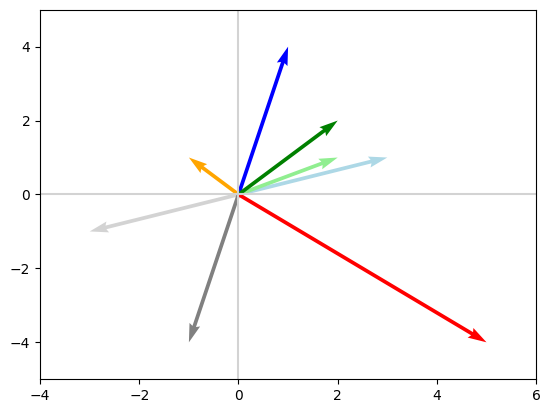

In [31]:
plot_vectors([vectorfy(V, 0), vectorfy(V, 1), vectorfy(V, 2), vectorfy(V, 3),
             vectorfy(AV, 0), vectorfy(AV, 1), vectorfy(AV, 2), vectorfy(AV, 3)],
            ['lightblue', 'lightgreen', 'lightgray', 'orange',
             'blue', 'green', 'gray', 'red'])
plt.xlim(-4, 6)
plt.ylim(-5, 5)

Eigenvectors and Eigenvalues

An eigenvector is a special vector `v` such that when it is transformed by some matrix(A), the product `Av` has the same direction as `v`.

An eigenvalue is a scalar that simply scales the eigenvector `v` such that the following equation is satisfied:

Av = λv


In [32]:
A = np.array([[-1, 4], [2, -2]])
A

array([[-1,  4],
       [ 2, -2]])

To get the eigen value and vector we use `eig()` method, which returns a tuple of:

* a vector of eigenvalues
* a vector of eigenvectors

In [33]:
lambdas, V = np.linalg.eig(A)

In [34]:
V #each column is a separate eigen vector v

array([[ 0.86011126, -0.76454754],
       [ 0.51010647,  0.64456735]])

In [36]:
lambdas

array([ 1.37228132, -4.37228132])

In [38]:
v = V[:,0]
v

array([0.86011126, 0.51010647])

In [39]:
lambduh = lambdas[0]
lambduh

1.3722813232690143

In [40]:
Av = np.dot(A, v)
Av

array([1.18031462, 0.70000958])

In [41]:
lambduh * v

array([1.18031462, 0.70000958])

(-1.0, 2.0)

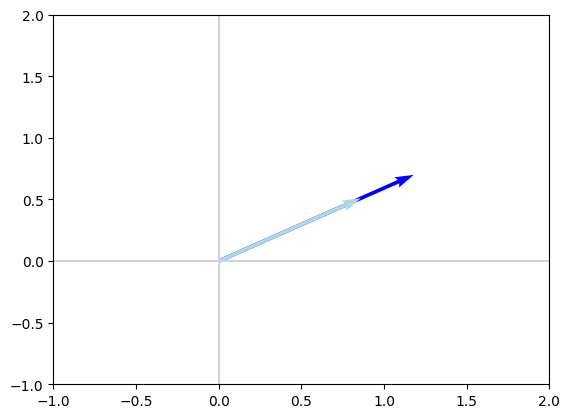

In [42]:
plot_vectors([Av, v], ['blue', 'lightblue'])
plt.xlim(-1, 2)
plt.ylim(-1, 2)

In [43]:
v2 = V[:,1]
v2

array([-0.76454754,  0.64456735])

In [44]:
lambda2 = lambdas[1]
lambda2

-4.372281323269014

In [45]:
Av2 = np.dot(A, v2)
Av2

array([ 3.34281692, -2.81822977])

In [46]:
lambda2 * v2

array([ 3.34281692, -2.81822977])

(-3.0, 2.0)

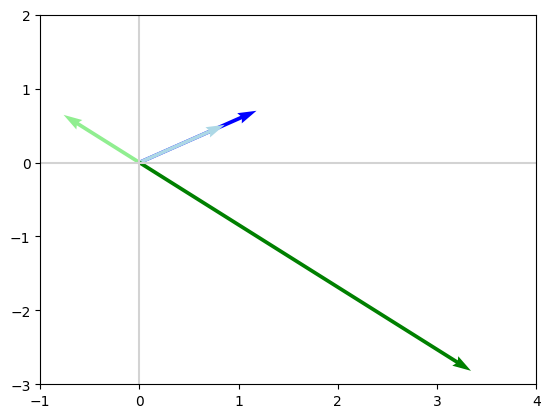

In [47]:
plot_vectors([Av, v, Av2, v2],
            ['blue', 'lightblue', 'green', 'lightgreen'])
plt.xlim(-1, 4)
plt.ylim(-3, 2)